<center><h1 style="padding-top:40px;padding-bottom:40px;">But Show Me *How* Jupyter is the New Excel</h1></center>

I read this great article just a few weeks ago called "[Jupyter is the New Excel](https://towardsdatascience.com/jupyter-is-the-new-excel-a7a22f2fc13a)". I loved it, and was provoked by its premise, and wrote to [the author](https://towardsdatascience.com/@semika) to tell her so. This dominant and for many users *intimidating* part of the data science toolchain, called a  Jupyter notebook, could be used for more everyday tasks. You didn't have to do data science *per se* with notebooks, didn't have to, like, crunch big data, worry about data storage, care what generalized least squares were. Jupyter was easy and useful enough to use for front office tasks, for fantasy football, dinner party invites, what have you. You could fool around with it! 

I work at IBM, where I fool around with data science as a rank amateur, and I took the article as a jumping off point: Yes, *how*? *How* would Jupyter replace Excel exactly? *How* could you use Jupyter for your email marketing and fantasy football, for your real estate office spreadsheets?

So I thought I'd create this tech talk, a presentation where we can step through examples of everyday data crunching, the things that many of do now in Excel, see if the article's premise checks out. 

My goal is to introduce Jupyter notebooks very, very briefly, get right into just a few super-practical, everyday tasks, to *not* talk about data science, to welcome and un-intimidate. If I'm successful, I'll persuade you that Jupyter notebooks are no more complicated to use than Excel, might work better for some things, can be the kind of ready-to-hand tool that spreadsheets are for many now. This might even be a gateway drug to do some better integrations of your data, which is where Jupyter starts to really outpace all these separate, versioned, weirdo macro-laden spreadsheets, or even be a useful starting point for some data-sciencing on your own :-)

## Agenda
1. [What is Jupyter?](#intro)
2. [Find the intersection of two email *lists*](#lists)
3. [Find the intersection of two email spreadsheet *files*](#spreadsheets)
4. [Teaser: Email integration with Jupyter](#integration)
5. [Crunching housing price data](#crunching)
6. [Plotting data in notebooks](#plotting)
7. [Resources for learning more](#resources)

<a name="intro"></a>
## What is Jupyter?

![jupyter web page](jupyter.png)

From [jupyter.org](https://jupyter.org/)

But since we want to show and not simply explain here, let's show it this way:
- Python is a **programming language**. A very popular and easy to use one. 
- It includes an **interpreter** that you can use to interact with Python line-by-line 
- **iPython** is an especially rich version of this interpreter. It supports plotting and graphs and lots of helper utilities. 
- **Jupyter notebooks** take all this and put it in your browser, where "the programming" can blend into reports, images, and other things you might put in a notebook. It's a big container!

<span style="color:red;font-weight:bold;">DEMO</span>: Start up Jupyter on your machine and browse a folder, view notebooks, create a notebook, mixing cells of code and text. Run the notebook, share the notebook, publish the notebook. 

<a name="lists"></a>
## Find the intersection of two email *lists* in Jupyter

One of the simplest common tasks you might do in a spreadsheet is to find the intersection of two mailing lists, as for example when you want to find out who on the *basketball* team list is also on the *ballet* list. 

The Python code below shows examples of those two lists, and defines a function, `segment()`, that you can use to find names that are on both.

In [2]:
def segment(x,y):
    # intersection of two lists in list form
    # we'll reuse this for lists we get from different files
    return list(set(x) & set(y)) 

bball_list = ['joe@cnn.com',
              'carol@coffee.com',
              'bob@vw.com',
              'sarah@gmail.com',
              'barry@gold.com']
ballet_list = ['jenny@cnn.com','carol@coffee.com','bob@vwco.com','barry@gold.com']

i = segment(bball_list, ballet_list)
print(i)

['carol@coffee.com', 'barry@gold.com']


<a name="spreadsheets"></a>
## Find intersection of two email *spreadsheets* in Jupyter

The example above is not very Excel-like at all. Sorry about that. I need to show how you can enter and manipulate simple data in the Jupyter notebook itself, change that data, test, learn as you go, get results. And for this we're doing some more Pythonic stuff. More like programming than Excel. 

But we're doing this to pave the way for basic, real tasks, like working with spreadsheets and real estate data. This is where Jupyter gets to upset Excel. 

So let's extend the example above and crunch the data in Excel files. In the next example, we use the `segment` function we defined above, this time pointing it at the email lists in two spreadsheets, *bball.xlsx* and *ballet.xslx*. Works just as we planned: We get a list of the emails that appear in both lists, to whom we might send, say, a meeting conflict notification, or a promotion for basketball shoes that double as pointe shoes.  

In [7]:
import pandas as pd
pd.options.mode.chained_assignment = None

bball  = pd.read_excel('bball.xlsx')['Email']  # read the column of the spreadsheet with the column header 'Email'
ballet = pd.read_excel('ballet.xlsx')['Email'] # because we need a Series here not the whole data frame

# create a variable and put the intersection into it
beez = segment(bball, ballet)

# just print that intersection (as a set of data, i.e. unicode strings)
print beez

[u'papathan@icloud.com', u'world@optonline.net', u'tskirvin@me.com', u'gavinls@icloud.com', u'ebassi@icloud.com', u'jwarren@icloud.com', u'eminence@msn.com', u'aprakash@yahoo.com', u'ilikered@msn.com', u'frikazoyd@gmail.com', u'jugalator@hotmail.com', u'bigmauler@comcast.net', u'agolomsh@hotmail.com', u'arandal@mac.com', u'saridder@yahoo.com', u'gfody@yahoo.ca', u'dsowsy@gmail.com', u'cliffski@comcast.net', u'campware@mac.com', u'cgcra@optonline.net', u'burns@aol.com', u'pkplex@comcast.net', u'camenisch@att.net', u'tubesteak@sbcglobal.net', u'larry@verizon.net', u'jimxugle@verizon.net', u'boein@mac.com', u'stecoop@verizon.net', u'parksh@comcast.net', u'trygstad@aol.com', u'qrczak@yahoo.com', u'eminence@optonline.net', u'rjones@msn.com', u'garyjb@att.net', u'speeves@outlook.com', u'lridener@yahoo.ca', u'kohlis@gmail.com', u'pthomsen@icloud.com', u'miyop@gmail.com', u'sscorpio@mac.com', u'claypool@me.com', u'skoch@live.com', u'tkrotchko@optonline.net']


So we read two spreadsheets and found a segment of emails. If we'd like to actually email that segment, we can stay in Jupyter and use Python's email libraries!, as in the following example, which takes our `beez` list and sends a promotional email to all its members.

A notebook like this, sitting beside spreadsheets like *bball.xslx* and *ballet.xlsx*, which may change constantly, will find the intersection whenever its run, and, if you set it up, email that intersection with whatever you set up as the email content. 



<a name="integration"></a>
## Example email integration from Jupyter

Once you get the hang of putting your data and your data-crunching in Jupyter, you can integrate other features of Python there as well, such as an email library that sends to your list whenever you run the notebook!

In [ ]:
# Send the email via our own SMTP server.
msg = MIMEMultipart()
msg['Subject'] = 'Basketball pointe shoes on sale!'
msg # define the msg text here

s = smtplib.SMTP('localhost')
s.sendmail(me, beez, msg.as_string())
s.quit()

# sent! Simple!
# Imagine the possibilities!


<a name="crunching"></a>
## Crunching housing data 

Now let's look at a different type of task. What about number-crunching? The following examples pull in a set of local housing data I found and begin to analyze that data, find interesting *features* of that data, such as price per square foot (PPSF), and *plot* that data for easy interpretation by others. 



In [26]:
housing_prices = pd.read_excel('Local_Data/housing_prices.xls')

housing_prices['PPSF'] = pd.to_numeric(housing_prices['VAL'],
                                        errors='coerce') / pd.to_numeric(housing_prices['SF'],
                                                                         errors='coerce')
# filter for the houses larger than 2000sf
big_houses = housing_prices[housing_prices['SF'] > 2200]

tiny_houses = housing_prices[housing_prices['SF'] > 900]

# filter for houses newer than 199
new_houses = housing_prices[housing_prices['Year built'] > 2010]

old_houses = housing_prices[housing_prices['Year built'] < 1965]

big_new_houses = big_houses[big_houses['Year built'] > 2010]

big_new_houses.head()


County                             Parcel  Card   TY1  Version   F  \
39   NH      R00700-001-004-000                    1  2017       28   1   
63   NH      R01100-008-032-000                    2  2017       30   2   
75   NH      R01100-018-007-000                    1  2017        7   3   
93   NH      R01113-005-004-000                    1  2017       33   1   
163  NH      R01700-001-001-000                   48  2017       32  48   

     Year built       TY2       Units     J    ...            R     SF    SF2  \
39         2016             WHSC          1    ...                4800   4800   
63         2015             WHSB       1.25    ...                8000   8000   
75         2015             RSOC-      0.92    ...               10200  10200   
93         2012             AG C+      1.08    ...                3115   3115   
163        2014            1MFGC          1    ...                2500   2500   

     U  V  W  X  Sale Date                                                  Z  \
39   0  0  0  0 2016-10-26                                                ...   
63   0  0  0  0 2015-12-02                                                ...   
75   0  0  0  0 2017-02-07                                                ...   
93   0  0  0  0 2016-11-09                                                ...   
163  0  0  0  0 2016-08-03                                                ...   

          PPSF  
39   27.004167  
63   46.887500  
75   41.741765  
93   48.287640  
163  77.270000  

[5 rows x 27 columns]

<a name="plotting"></a>
## Plotting data in notebooks

Now that we've begun to dig into the data a bit, we can show another really nice feature of Jupyter notebooks, and that is the ability to build and embed charts into the notebooks themselves, again using live data, imported data, different logic, as in the following example, where we take the (somewhat arbitrary) categories of houses and the (totally unclean and useless-as-data) data about price-per-square-foot and visualize it in the notebook.

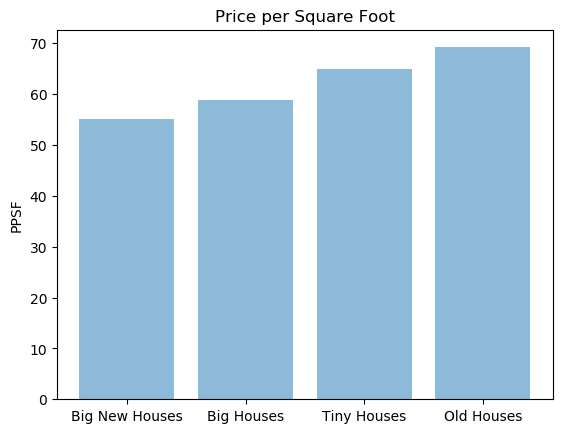

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Big New Houses', 'Big Houses', 'Tiny Houses', 'Old Houses')
y_pos = np.arange(len(objects))
performance = [ big_new_houses['PPSF'].mean(), big_houses['PPSF'].mean(), 
                tiny_houses['PPSF'].mean(), old_houses['PPSF'].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('PPSF')
plt.title('Price per Square Foot')

plt.show()

<a name="resources"></a>
## Resources for learning more

Jupyter and Python and a lot of the premier data science tools are open source, which means there are a TON of resources out there for learning, trying. Here are a few good ones, focusing again not on the ocean of data science but on Jupyter notebooks:

- [jupyter.org/try](http://jupyter.org/try) - Try Jupyter notebooks on a test server
- [Install Jupyter](https://jupyter.org/install) - Install Jupyter on your system as part of Anaconda, a really nice and easy-to-use distribution of data science tools
- ["Jupyter is the New Excel"](https://towardsdatascience.com/jupyter-is-the-new-excel-a7a22f2fc13a), by [Semi Koen](https://towardsdatascience.com/@semika)
- [Jupyter Notebook basics](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) - The main tutorial and description of Jupyter notebooks, from readthedocs.io
- [iPython](http://cs231n.github.io/ipython-tutorial/) - A lot of the interactive and in-cell features of notebooks are in fact iPython
- [Python Tutorial](https://www.learnpython.org/) (Learn Python)
- [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet), a quick reference for Markdown, the simple text formatting in Jupyter notebooks and elsewhere
